## Semester 1 Project Submission

Please fill out:
* Student name: Neil Dilawari
* Instructor name: Lera + Charlie


In [ ]:
# Your code here - remember to use markdown cells for comments as well!



In [2]:
import pandas as pd

In [6]:
bomDF = pd.read_csv('zippedData/bom.movie_gross.csv')
bomDF.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
tmdbDF = pd.read_csv('zippedData/tmdb.movies.csv')
tmdbDF.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [15]:
tnDF = pd.read_csv('zippedData/tn.movie_budgets.csv')
tnDF

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [21]:
basics_and_ratings = pd.read_sql("""
select *
from movie_basics b
inner join
movie_ratings r
on b.movie_id=r.movie_id
""", con)

In [22]:
budget_SQLratings_merge = pd.merge(tnDF, basics_and_ratings, left_on='movie', right_on="primary_title")

In [24]:
tnDF["production_budget"] = tnDF["production_budget"].str.replace("$", "")
tnDF["domestic_gross"] = tnDF["domestic_gross"].str.replace("$", "")
tnDF["worldwide_gross"] = tnDF["worldwide_gross"].str.replace("$", "")



tnDF["production_budget"] = tnDF["production_budget"].str.replace(",", "")
tnDF["domestic_gross"] = tnDF["domestic_gross"].str.replace(",", "")
tnDF["worldwide_gross"] = tnDF["worldwide_gross"].str.replace(",", "")



tnDF["production_budget"] = tnDF["production_budget"].astype(int)
tnDF["domestic_gross"] = tnDF["domestic_gross"].astype(int)
tnDF["worldwide_gross"] = tnDF["worldwide_gross"].astype(float)

AttributeError: Can only use .str accessor with string values!

In [13]:
infoDF = pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')
infoDF.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [3]:
import sqlite3
import matplotlib.pyplot as plt
DBfile = 'zippedData/im.db'
con = sqlite3.connect(DBfile)
cursor = con.cursor()

In [17]:
pd.read_sql("""
SELECT *
FROM movie_basics
;
""", con)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [18]:
pd.read_sql("""
SELECT *
FROM movie_ratings
;
""", con)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [20]:
pd.read_sql("""
SELECT *
FROM movie_akas
;
""", con)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [31]:
Correlation_Data = pd.read_sql("""
SELECT averagerating, AVG(runtime_minutes) AS "Average Runtime"
FROM movie_basics
    JOIN movie_ratings
        USING(movie_id)
WHERE runtime_minutes IS NOT NULL AND numvotes>= 1000
GROUP BY averagerating
ORDER BY averagerating DESC
;
""", con)
Correlation_Data

,averagerating,Average Runtime
0,9.7,159.000000
1,9.6,119.000000
2,9.5,113.000000
3,9.4,147.000000
4,9.3,140.500000
...,...,...
81,1.6,100.250000
82,1.5,96.500000
83,1.4,96.666667
84,1.3,90.333333


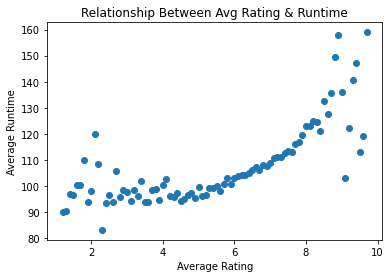

In [32]:
plt.scatter(Correlation_Data['averagerating'], Correlation_Data['Average Runtime'])
plt.xlabel('Average Rating')
plt.ylabel('Average Runtime')
plt.title('Relationship Between Avg Rating & Runtime')
plt.show()

In [38]:
budget_SQLratings_merge.to_csv(index=True)

',id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes\r\n0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279.0,tt1775309,Avatar,Abatâ,2011,93.0,Horror,tt1775309,6.1,43\r\n1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",tt1298650,6.6,447624\r\n2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350.0,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",tt6565702,6.0,24451\r\n3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963.0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",tt2395427,7.3,665594\r\n4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200.0,tt4154756,Avengers